In [7]:
import pandas as pd
import matplotlib.pyplot as plt
# 解决负号显示问题
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('air_data.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/2,2008/12/24,男,6,.,北京,CN,31.0,2014/3/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/2/19,2007/8/3,男,6,NaN,北京,CN,42.0,2014/3/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/2/1,2007/8/30,男,6,.,北京,CN,40.0,2014/3/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/8/22,2008/8/23,男,5,Los Angeles,CA,US,64.0,2014/3/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/4/10,2009/4/15,男,6,贵阳,贵州,CN,48.0,2014/3/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


In [3]:
from datetime import datetime

In [5]:
ffp = df['FFP_DATE'].apply(lambda x: datetime.strptime(x,'%Y/%m/%d'))
ffp

0       2006-11-02
1       2007-02-19
2       2007-02-01
3       2008-08-22
4       2009-04-10
           ...    
62983   2011-05-20
62984   2010-03-08
62985   2006-03-30
62986   2013-02-06
62987   2013-02-17
Name: FFP_DATE, Length: 62988, dtype: datetime64[ns]

In [6]:
ffp_year = ffp.map(lambda x: x.year)
ffp_year

0        2006
1        2007
2        2007
3        2008
4        2009
         ... 
62983    2011
62984    2010
62985    2006
62986    2013
62987    2013
Name: FFP_DATE, Length: 62988, dtype: int64

# 1.提取会员入会年份

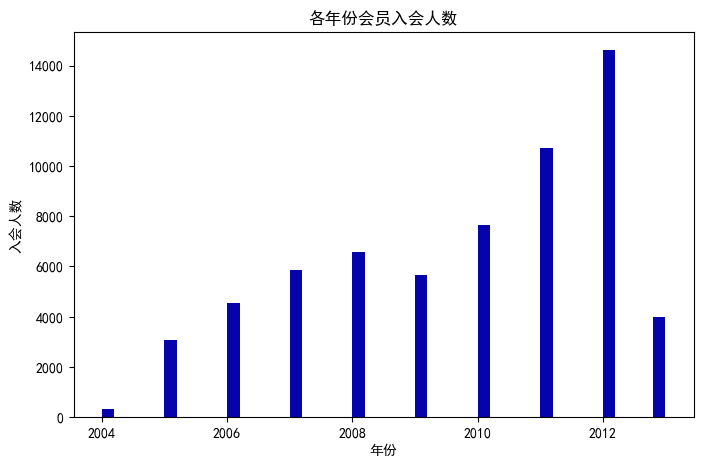

In [8]:
fig = plt.figure(figsize=(8, 5))
plt.hist(ffp_year, bins='auto', color='#0504aa')
plt.xlabel('年份')
plt.ylabel('入会人数')
plt.title('各年份会员入会人数')
plt.show()
plt.close()

# 2.提取会员不同性别人数

In [10]:
male = pd.Series(df['GENDER']).value_counts()['男']
male

48134

In [11]:
female = pd.Series(df['GENDER']).value_counts()['女']
female

14851

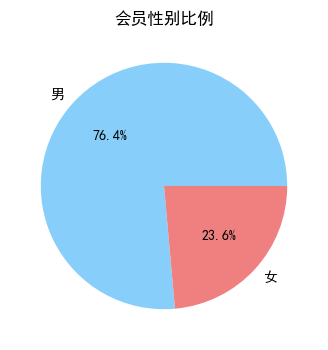

In [12]:
fig = plt.figure(figsize=(7, 4))
plt.pie([male, female], labels=['男', '女'], colors=['lightskyblue', 'lightcoral'], autopct='%1.1f%%')
plt.title('会员性别比例')
plt.show()
plt.close()

# 3.提取不同级别会员的人数

In [21]:
lv_four = pd.Series(df['FFP_TIER']).value_counts()[4]
lv_four

58066

In [23]:
lv_five = pd.Series(df['FFP_TIER']).value_counts()[5]
lv_five

3409

In [24]:
lv_six = pd.Series(df['FFP_TIER']).value_counts()[6]
lv_six

1513

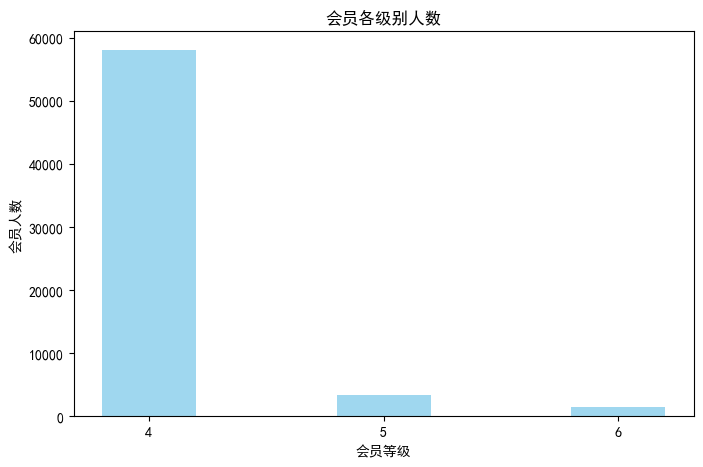

In [25]:
fig = plt.figure(figsize = (8 ,5))  # 设置画布大小
plt.bar(x=range(3), height=[lv_four,lv_five,lv_six], width=0.4, alpha=0.8, color='skyblue')
plt.xticks([index for index in range(3)], ['4','5','6'])
plt.xlabel('会员等级')
plt.ylabel('会员人数')
plt.title('会员各级别人数')
plt.show()
plt.close()

# 4. 绘制会员年龄分布箱型图

In [26]:
age = df['AGE'].dropna()
age = age.astype('int64')
age

0        31
1        42
2        40
3        64
4        48
         ..
62983    25
62984    38
62985    43
62986    36
62987    29
Name: AGE, Length: 62568, dtype: int64

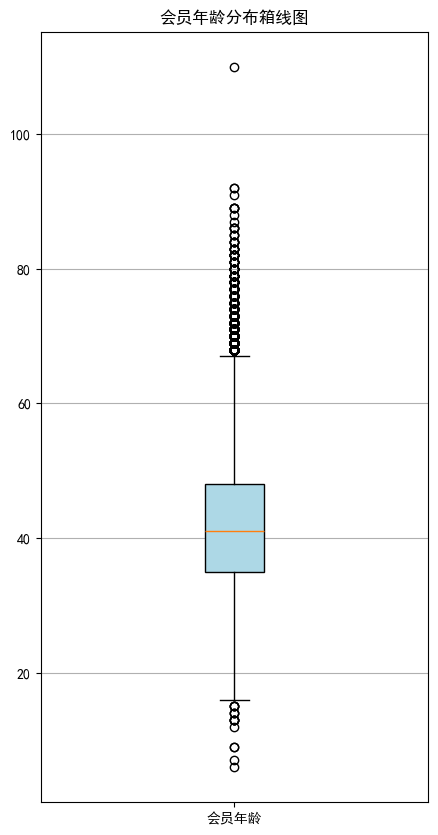

In [27]:
fig = plt.figure(figsize = (5 ,10))
plt.boxplot(age,
            patch_artist=True,
            labels = ['会员年龄'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('会员年龄分布箱线图')
# 显示y坐标轴的底线
plt.grid(axis='y')
plt.show()
plt.close()

# 5.乘机信息类别

In [28]:
lte = df['LAST_TO_END']
fc = df['FLIGHT_COUNT']
sks = df['SEG_KM_SUM']

## 5.1 绘制最后乘机至结束时长箱线图

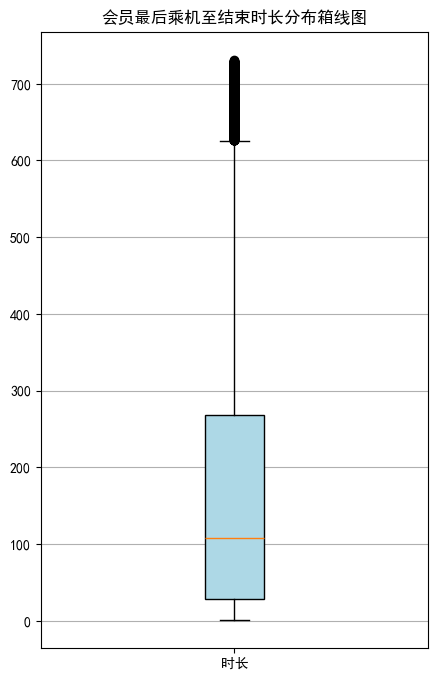

In [30]:
fig = plt.figure(figsize = (5 ,8))
plt.boxplot(lte,
            patch_artist=True,
            labels = ['时长'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('会员最后乘机至结束时长分布箱线图')
# 显示y坐标轴的底线
plt.grid(axis='y')
plt.show()
plt.close()

## 5.2 绘制客户飞行次数箱线图

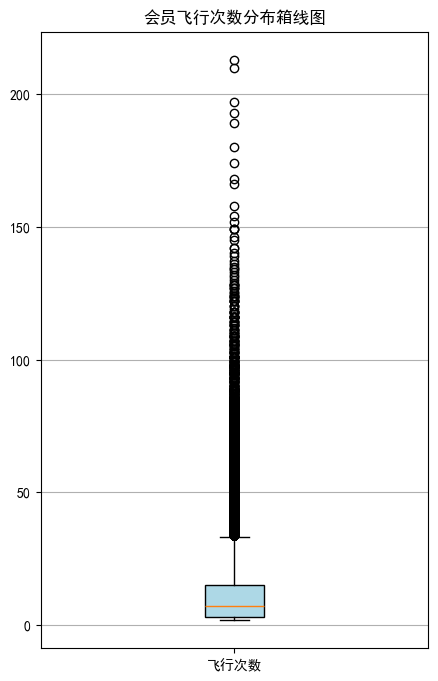

In [31]:
fig = plt.figure(figsize = (5 ,8))
plt.boxplot(fc,
            patch_artist=True,
            labels = ['飞行次数'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('会员飞行次数分布箱线图')
# 显示y坐标轴的底线
plt.grid(axis='y')
plt.show()
plt.close()

# 5.3 绘制客户总飞行公里数箱线图

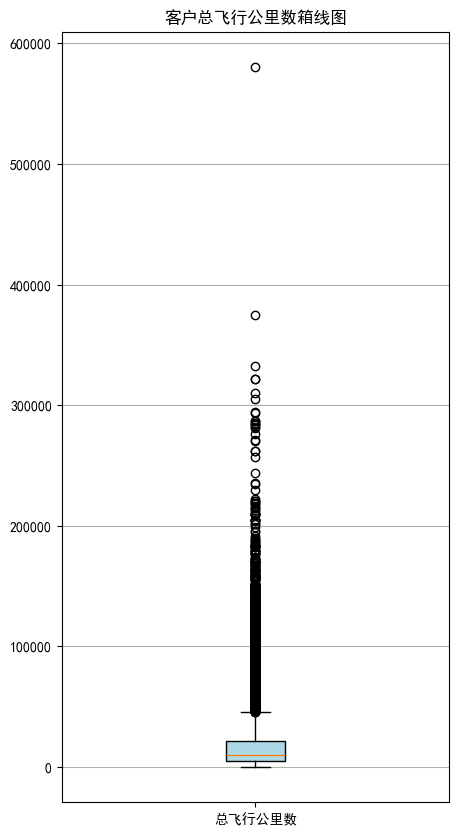

In [32]:
fig = plt.figure(figsize = (5 ,10))
plt.boxplot(sks,
            patch_artist=True,
            labels = ['总飞行公里数'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('客户总飞行公里数箱线图')
# 显示y坐标轴的底线
plt.grid(axis='y')
plt.show()
plt.close()

# 6.积分信息类别

## 6.1 绘制会员兑换积分次数直方图

In [33]:
ec = df['EXCHANGE_COUNT']

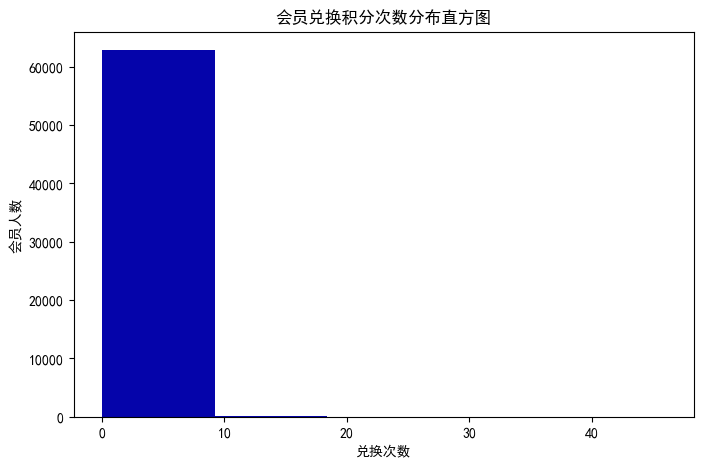

In [34]:
fig = plt.figure(figsize = (8 ,5))  # 设置画布大小
plt.hist(ec, bins=5, color='#0504aa')
plt.xlabel('兑换次数')
plt.ylabel('会员人数')
plt.title('会员兑换积分次数分布直方图')
plt.show()
plt.close()

## 6.2 绘制会员总累计积分箱线图

In [35]:
ps = df['Points_Sum']

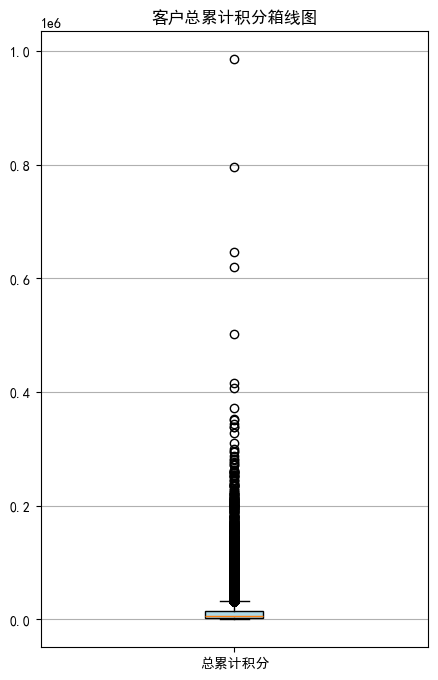

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [36]:
fig = plt.figure(figsize = (5 ,8))
plt.boxplot(ps,
            patch_artist=True,
            labels = ['总累计积分'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('客户总累计积分箱线图')
# 显示y坐标轴的底线
plt.grid(axis='y')
plt.show()
plt.close

# 7.绘制热力图

In [38]:
# 提取属性并合并为新数据集
data_corr = df[['FFP_TIER', 'FLIGHT_COUNT', 'LAST_TO_END',
                 'SEG_KM_SUM', 'EXCHANGE_COUNT', 'Points_Sum']].copy()  # 使用 .copy() 创建副本
age1 = df['AGE'].fillna(0)
data_corr.loc[:, 'AGE'] = age1.astype('int64')  # 使用 .loc 进行赋值
data_corr.loc[:, 'ffp_year'] = ffp_year  # 使用 .loc 进行赋值

In [39]:
# 计算相关性矩阵
dt_corr = data_corr.corr(method = 'pearson')
print('相关性矩阵为：\n',dt_corr)

相关性矩阵为：
                 FFP_TIER  FLIGHT_COUNT  LAST_TO_END  SEG_KM_SUM  \
FFP_TIER        1.000000      0.582447    -0.206313    0.522350   
FLIGHT_COUNT    0.582447      1.000000    -0.404999    0.850411   
LAST_TO_END    -0.206313     -0.404999     1.000000   -0.369509   
SEG_KM_SUM      0.522350      0.850411    -0.369509    1.000000   
EXCHANGE_COUNT  0.342355      0.502501    -0.169717    0.507819   
Points_Sum      0.559249      0.747092    -0.292027    0.853014   
AGE             0.076245      0.075309    -0.027654    0.087285   
ffp_year       -0.116510     -0.188181     0.117913   -0.171508   

                EXCHANGE_COUNT  Points_Sum       AGE  ffp_year  
FFP_TIER              0.342355    0.559249  0.076245 -0.116510  
FLIGHT_COUNT          0.502501    0.747092  0.075309 -0.188181  
LAST_TO_END          -0.169717   -0.292027 -0.027654  0.117913  
SEG_KM_SUM            0.507819    0.853014  0.087285 -0.171508  
EXCHANGE_COUNT        1.000000    0.578581  0.032760 -0.216610

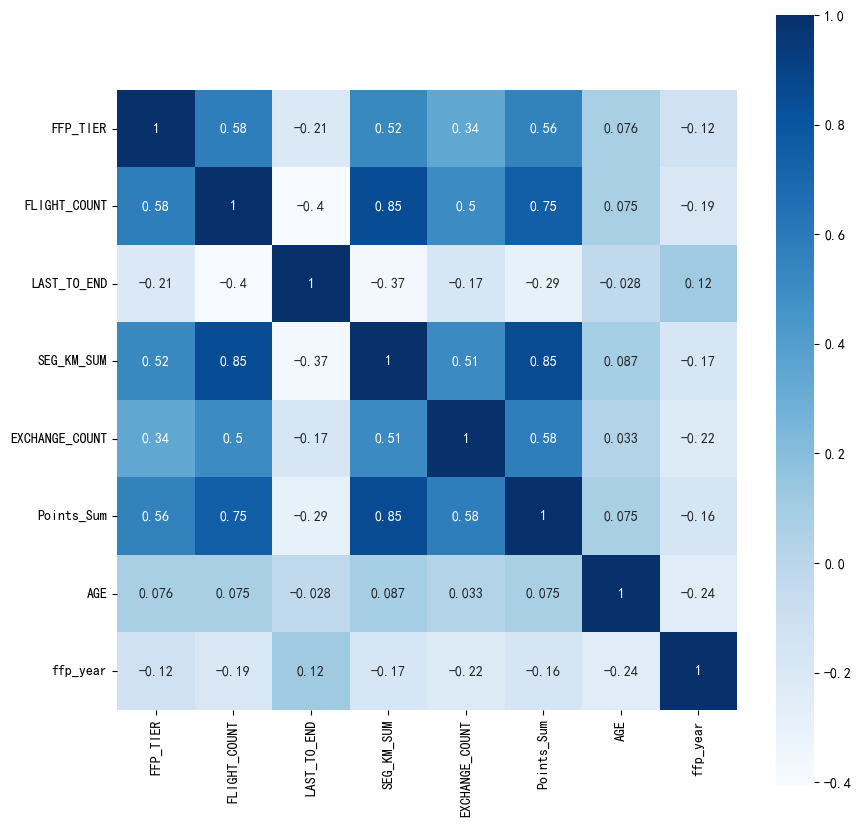

In [40]:
# 绘制热力图
import seaborn as sns
plt.subplots(figsize=(10, 10)) # 设置画面大小
sns.heatmap(dt_corr, annot=True, vmax=1, square=True, cmap='Blues')
plt.show()
plt.close()